# Análise de Séries Temporais

## Introdução


Aqui almejo criar um base line para comparativo de ad_tests futuros com Neuro-Evolução

### Estrutura do Projeto
- **data:** Obtido a partir do site kaggle.com, se trata do consumo energético da india(2019-2020)
- **Pré-processamento:** A fazer
- **Análise Exploratória:** A fazer
- **Modelagem:** A fazer
- **Avaliação:** A fazer
- **Conclusão:** A fazer

# Código

## Importação de LIBs

In [44]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from pmdarima import model_selection
from arch import arch_model
from scipy.stats import boxcox
from scipy.special import boxcox, inv_boxcox
from scipy.stats import shapiro
# from mpl_finance import candlestick2_ohlc

## Leitura e Visualização dos Dados
**"dataSet" é a variável que recebe os dados brutos**

##### Leitura do DataSet selecionado para estudo

In [45]:
dataSet = pd.read_csv('./dataset_tk.csv', decimal='.')

dataSet["data"] = [pd.Timestamp( \
    day = int(item.split(" ")[0].strip().split("/")[0]), \
    month = int(item.split(" ")[0].strip().split("/")[1]), \
    year = int(item.split(" ")[0].strip().split("/")[2]) \
) for item in dataSet["data"]]

dataSet

,data,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


##### Analisando se há valores nulos e tipo de valor da variável

In [46]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data               503 non-null    datetime64[ns]
 1   Punjab             503 non-null    float64       
 2   Haryana            503 non-null    float64       
 3   Rajasthan          503 non-null    float64       
 4   Delhi              503 non-null    float64       
 5   UP                 503 non-null    float64       
 6   Uttarakhand        503 non-null    float64       
 7   HP                 503 non-null    float64       
 8   J&K                503 non-null    float64       
 9   Chandigarh         503 non-null    float64       
 10  Chhattisgarh       503 non-null    float64       
 11  Gujarat            503 non-null    float64       
 12  MP                 503 non-null    float64       
 13  Maharashtra        503 non-null    float64       
 14  Goa       

##### Analisando características estatísticas

In [47]:
dataSet.describe()

,data,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2019-09-25 13:27:18.966202880,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
min,2019-01-02 00:00:00,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,2019-05-11 12:00:00,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,2019-09-12 00:00:00,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,2020-01-25 12:00:00,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,2020-12-05 00:00:00,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000
std,NaN,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047


## Visualização de Gráficos

#### Configurações básicas

**Criando uma coluna com o consumo total de energia ao longo do tempo**

In [48]:
dataSet.insert(1, "consumoTotal", dataSet.iloc[:, 1:].sum(axis=1))
print(dataSet['consumoTotal'])

print(dataSet['consumoTotal'].mean())

0      3373.4
1      3403.7
2      3304.1
3      3308.9
4      3316.9
        ...  
498    3741.5
499    3763.8
500    3726.6
501    3642.1
502    3407.0
Name: consumoTotal, Length: 503, dtype: float64
3399.061431411531


### Funções auxiliares

##### Histograma

In [49]:
def plotHistogram(data, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(20, 10))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

##### Gráfico de Linha

In [50]:
def plotLine(data, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(20, 10))
    plt.plot(data.index, data.values, linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

##### BloxPlot

In [51]:
def plotBoxplot(data, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

##### Gráfico de Dispersão

In [52]:
def plotScatter(datax, datay, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=datax, y=datay)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

##### Gráfico de Área

In [53]:
def plotArea(data, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(20, 10))
    plt.fill_between(data.index, data.values, alpha=0.5)
    plt.plot(data.index, data.values, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

##### Gráfico Q-Q

In [54]:
def graficoQQ(data, title=None):
    plt.figure(figsize=(20, 10))
    sm.qqplot(data, line='s')
    plt.title(title)
    plt.show()

##### Decomposição

In [55]:

def plotDecomposicao(data, model='additive', period=7, title=None, figsize=(20, 10)):

    # Realiza a decomposição
    decomposition = seasonal_decompose(data, model=model, period=period)
    
    # Cria uma figura para plotar os componentes
    plt.figure(figsize=figsize)
    
    # Série Original
    plt.subplot(4, 1, 1)
    plt.plot(data, label='Original')
    plt.legend(loc='upper left')
    plt.title(title)
    
    # Tendência
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Tendência', color='orange')
    plt.legend(loc='upper left')
    
    # Sazonalidade
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Sazonalidade', color='green')
    plt.legend(loc='upper left')
    
    # Resíduos
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Resíduos', color='red')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

### Gráfico original

**Histograma**

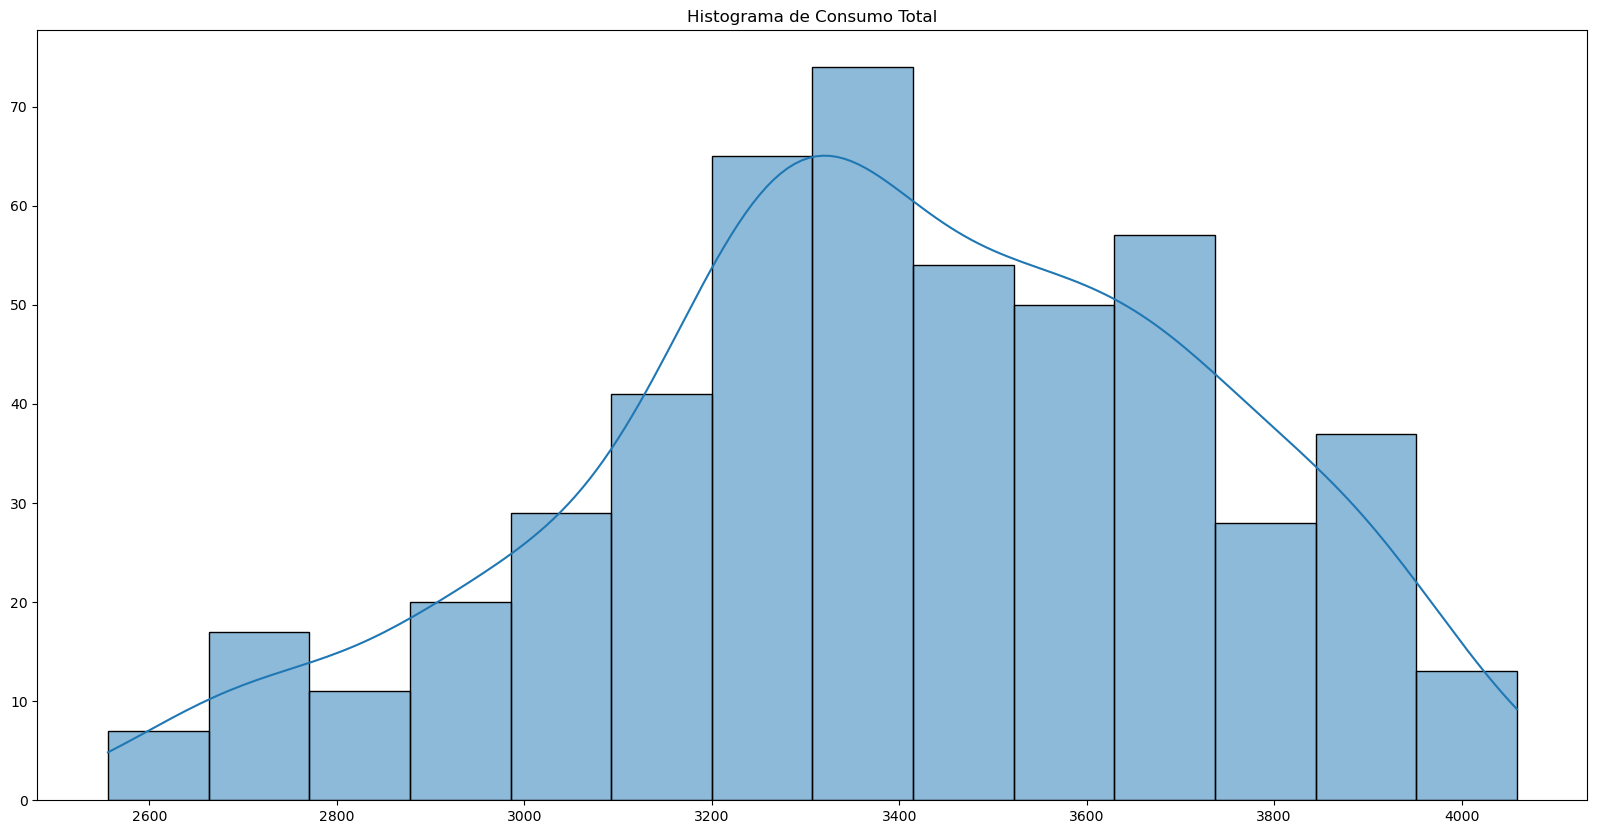

In [56]:
plotHistogram(dataSet['consumoTotal'], title='Histograma de Consumo Total')

**Grafico de QQ**

<Figure size 2000x1000 with 0 Axes>

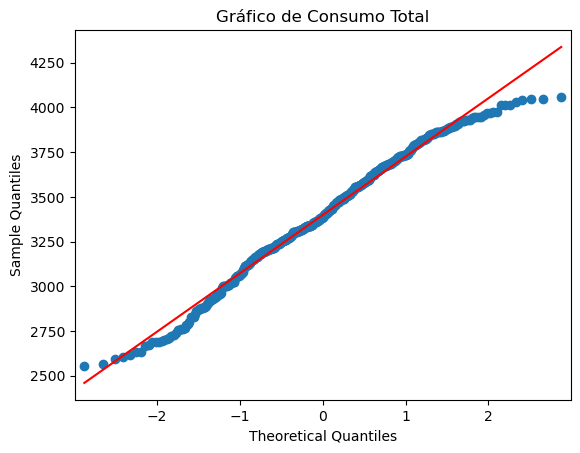

In [57]:
graficoQQ(dataSet['consumoTotal'], title="Gráfico de Consumo Total")

**Decomposição**

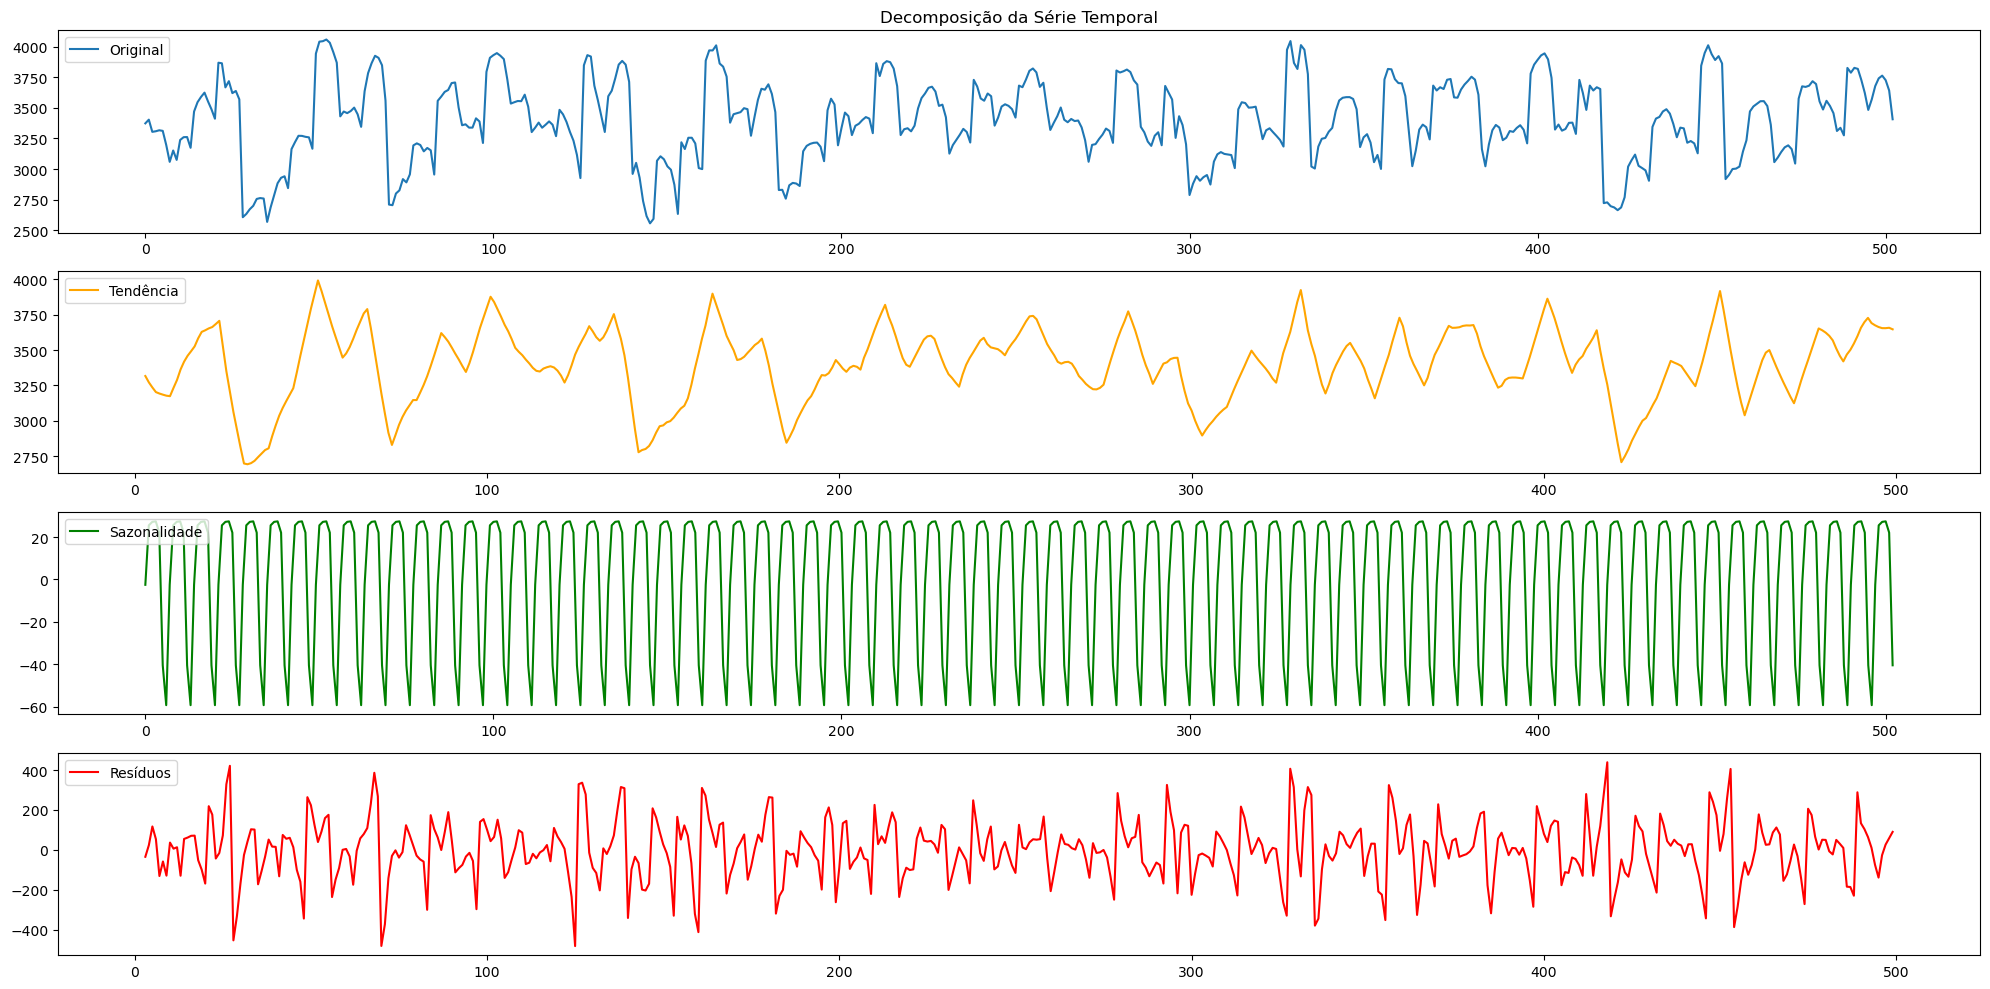

In [58]:
plotDecomposicao(dataSet['consumoTotal'], title="Decomposição da Série Temporal")

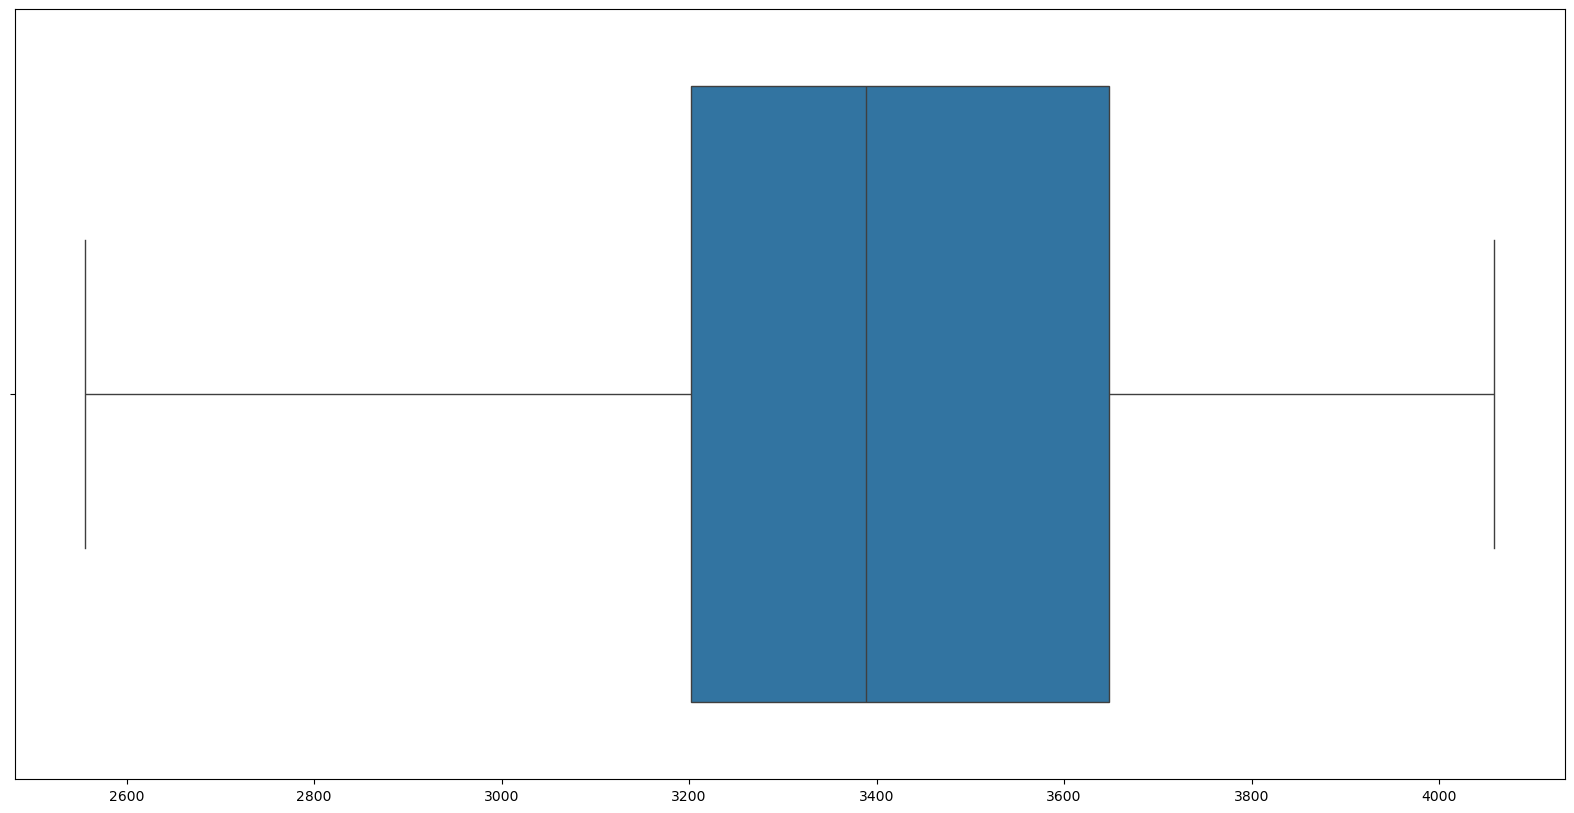

In [59]:
plotBoxplot(dataSet['consumoTotal'])

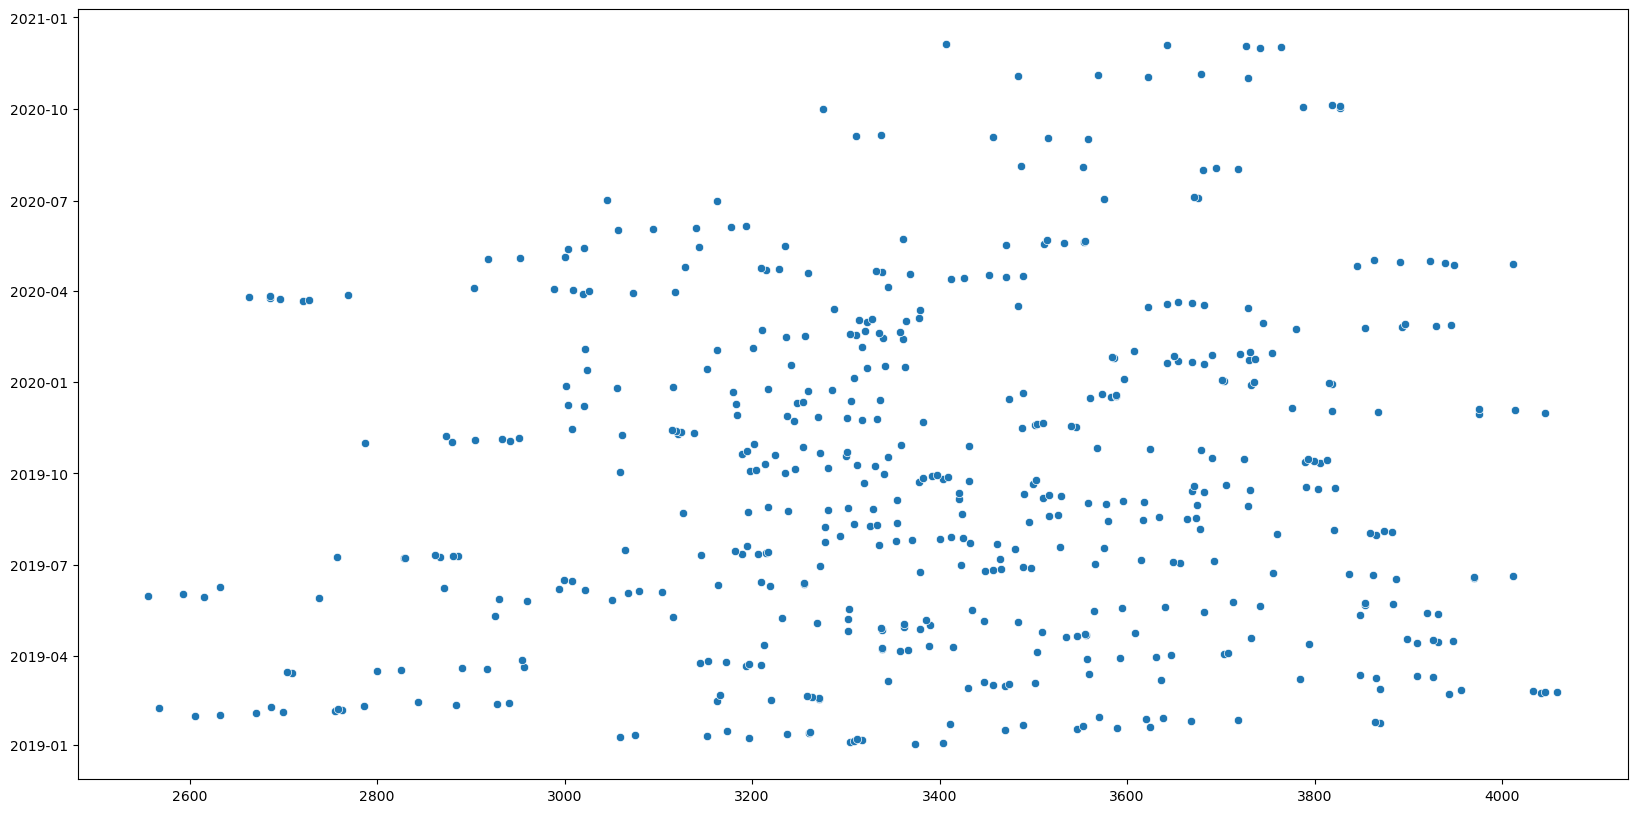

In [60]:
plotScatter(dataSet['consumoTotal'], dataSet['data'])

## Análise

#### Configurações básicas

**Decompondo a Série escolhida**

In [61]:
data = dataSet['consumoTotal']

**Definindo Parâmetros**

In [62]:
periodicidade = 7

### Estacionariedade

##### AdFuller

In [63]:
def adfullerTest(data):
    adFUllerTest = adfuller(data)
    print(f"Estatística do teste ADF: {adFUllerTest[0]}")
    print(f"Valor-p: {adFUllerTest[1]:.16f}")
    print("Valores críticos:")
    for key, value in adFUllerTest[4].items():
        print(f"   {key}: {value}")

    # Interpretação
    if adFUllerTest[1] <= 0.0005:
        print("A série é estacionária.")
    else:
        print("A série não é estacionária.")
        
adfullerTest(data)

Estatística do teste ADF: -5.940089379866558
Valor-p: 0.0000002271784085
Valores críticos:
   1%: -3.4436298692815304
   5%: -2.867396599893435
   10%: -2.5698893429241916
A série é estacionária.


### Normalização

#### Funções Auxiliares

##### Kolmogorov-Smirnov

In [64]:
def kolmogorovTest(data):
    ks_test = stats.kstest(data, 'norm')
    
    print('\nTeste de Kolmogorov-Smirnov')
    print(f'Estatística: {ks_test.statistic:.8f}')
    print(f'Valor-p: {ks_test.pvalue:.8f}')
    if ks_test.pvalue < 0.05:
        print('Rejeita a hipótese nula (os dados não seguem uma distribuição normal)')
    else:
        print('Não rejeita a hipótese nula (os dados seguem uma distribuição normal)')

kolmogorovTest(data)


Teste de Kolmogorov-Smirnov
Estatística: 1.00000000
Valor-p: 0.00000000
Rejeita a hipótese nula (os dados não seguem uma distribuição normal)


##### Anderson-Darling

In [65]:
def andersonTest(data):
    ad_test = stats.anderson(data, dist='norm')
    
    print('\nTeste de Anderson-Darling')
    print(f'Estatística: {ad_test.statistic:.8f}')
    print('Valores Críticos:', [f'{cv:.8f}' for cv in ad_test.critical_values])
    print('Níveis de Significância:', ad_test.significance_level)
    
    for i in range(len(ad_test.critical_values)):
        sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
        if ad_test.statistic > cv:
            print(f'Para um nível de significância de {sl}%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)')
        else:
            print(f'Para um nível de significância de {sl}%, não rejeita a hipótese nula (os dados seguem uma distribuição normal)')
            
andersonTest(data)


Teste de Anderson-Darling
Estatística: 1.18485333
Valores Críticos: ['0.57200000', '0.65100000', '0.78100000', '0.91100000', '1.08300000']
Níveis de Significância: [15.  10.   5.   2.5  1. ]
Para um nível de significância de 15.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 10.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 5.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 2.5%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 1.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)


### AutoCorrelação

#### Função de AutoCorrelação

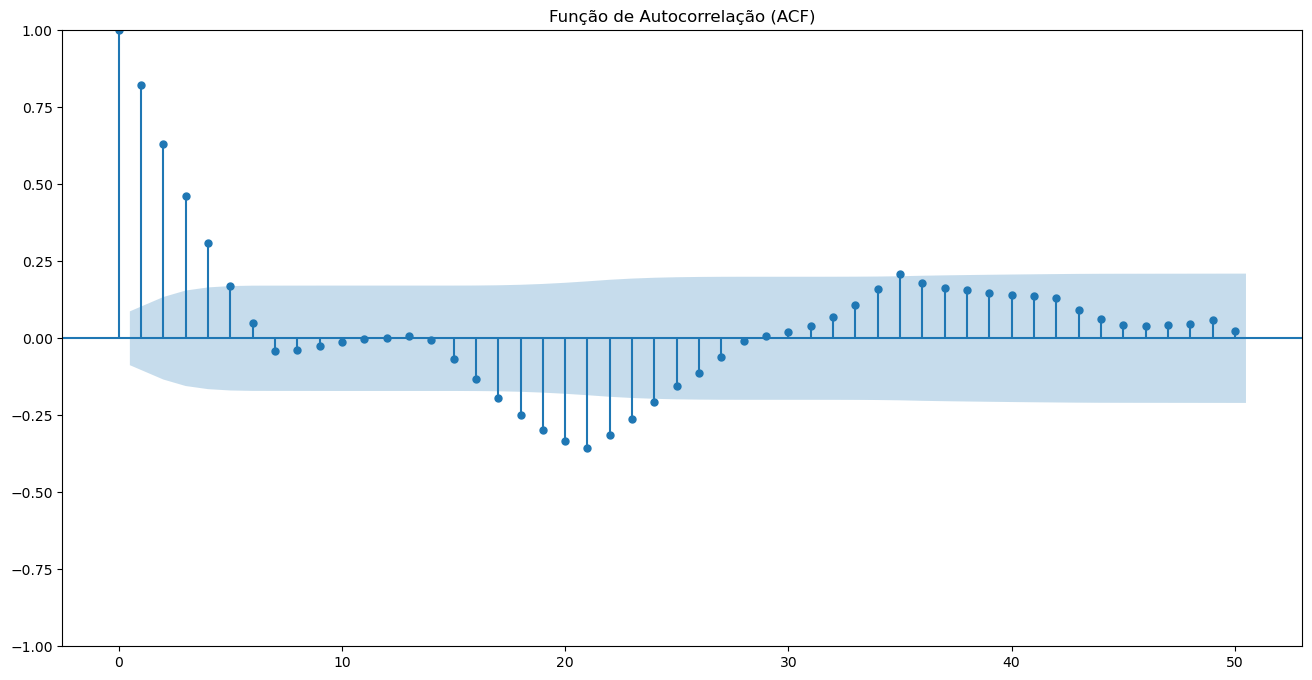

In [66]:
def plotAutoCorrelation(data):
    plt.figure(figsize=(16, 8))
    plot_acf(data, ax=plt.gca(), lags=50)
    plt.title('Função de Autocorrelação (ACF)')
    plt.show()

plotAutoCorrelation(data)

#### Função de AutoCorrelação Parcial

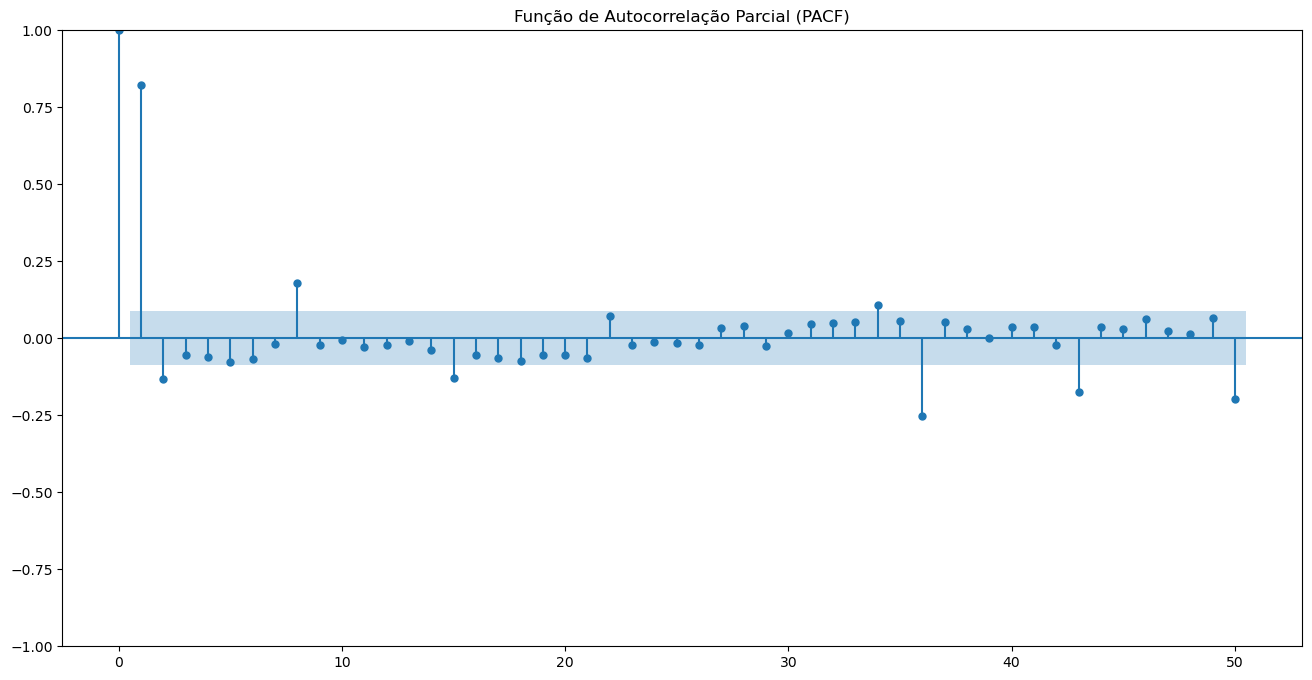

In [67]:
def plotPartialAutoCorrelation(data):
    plt.figure(figsize=(16, 8))
    plot_pacf(data, ax=plt.gca(), lags=50)
    plt.title('Função de Autocorrelação Parcial (PACF)')
    plt.show()
plotPartialAutoCorrelation(data)

## Predição

### Ajustando Série (1 Diferenciação)

#### Transformações


**Conferindo Propriedades**

In [68]:
adfullerTest(data)
kolmogorovTest(data)
andersonTest(data)

Estatística do teste ADF: -5.940089379866558
Valor-p: 0.0000002271784085
Valores críticos:
   1%: -3.4436298692815304
   5%: -2.867396599893435
   10%: -2.5698893429241916
A série é estacionária.

Teste de Kolmogorov-Smirnov
Estatística: 1.00000000
Valor-p: 0.00000000
Rejeita a hipótese nula (os dados não seguem uma distribuição normal)

Teste de Anderson-Darling
Estatística: 1.18485333
Valores Críticos: ['0.57200000', '0.65100000', '0.78100000', '0.91100000', '1.08300000']
Níveis de Significância: [15.  10.   5.   2.5  1. ]
Para um nível de significância de 15.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 10.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 5.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 2.5%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significân

**Primeira Diferenciação**

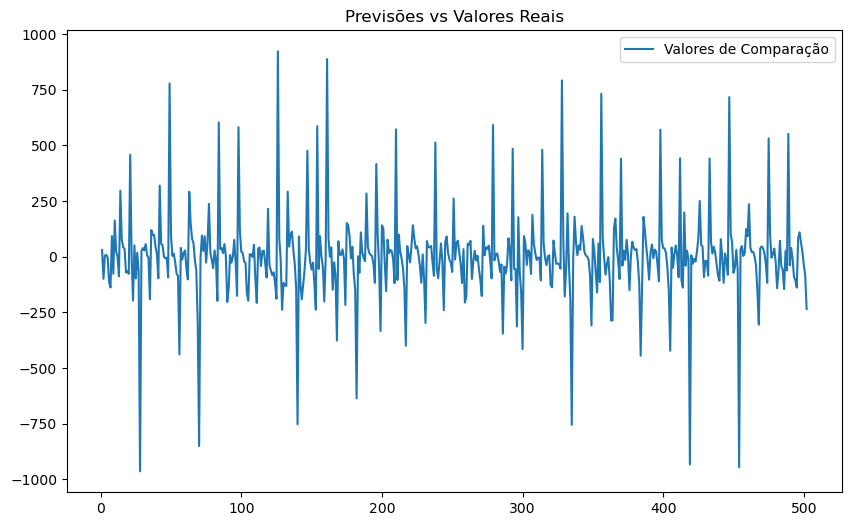

In [69]:
ValorInicialData = data.iloc[0]
dataDiff = data.diff().dropna()
# dataDiff = dataDiff1.diff().dropna()

plt.figure(figsize=(10, 6))
# plt.plot(dataNormal, label="Valores Originais")
plt.plot(dataDiff, label="Valores de Comparação")
plt.title("Previsões vs Valores Reais")
plt.legend()
plt.show()

<h4>Primeira Normalização</h4>

MinMaxScaler: Ajusta os valores da série para um intervalo de 0 à 1<br>
Ideal para mdelos que exigem escalas fixas (como redes neurais ou SVMs).

In [70]:
# scaler = MinMaxScaler()

# # Reshape necessário para o MinMaxScaler (ele espera uma matriz 2D)
# dataNormal = scaler.fit_transform(dataDiff.values.reshape(-1, 1))

# # Converter de volta para uma Series
# dataNormal = pd.Series(dataNormal.flatten())

# dataNormal.info()

Standardization: Ajusta os valores da série para ter média 0 e desvio padrão 1<br>
Ideal para modelos que assumem média zero e desvio padrão unitário (como SARIMA).

<class 'pandas.core.series.Series'>
Index: 502 entries, 1 to 502
Series name: consumoTotal
Non-Null Count  Dtype  
--------------  -----  
502 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 502 entries, 0 to 501
Series name: None
Non-Null Count  Dtype  
--------------  -----  
502 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


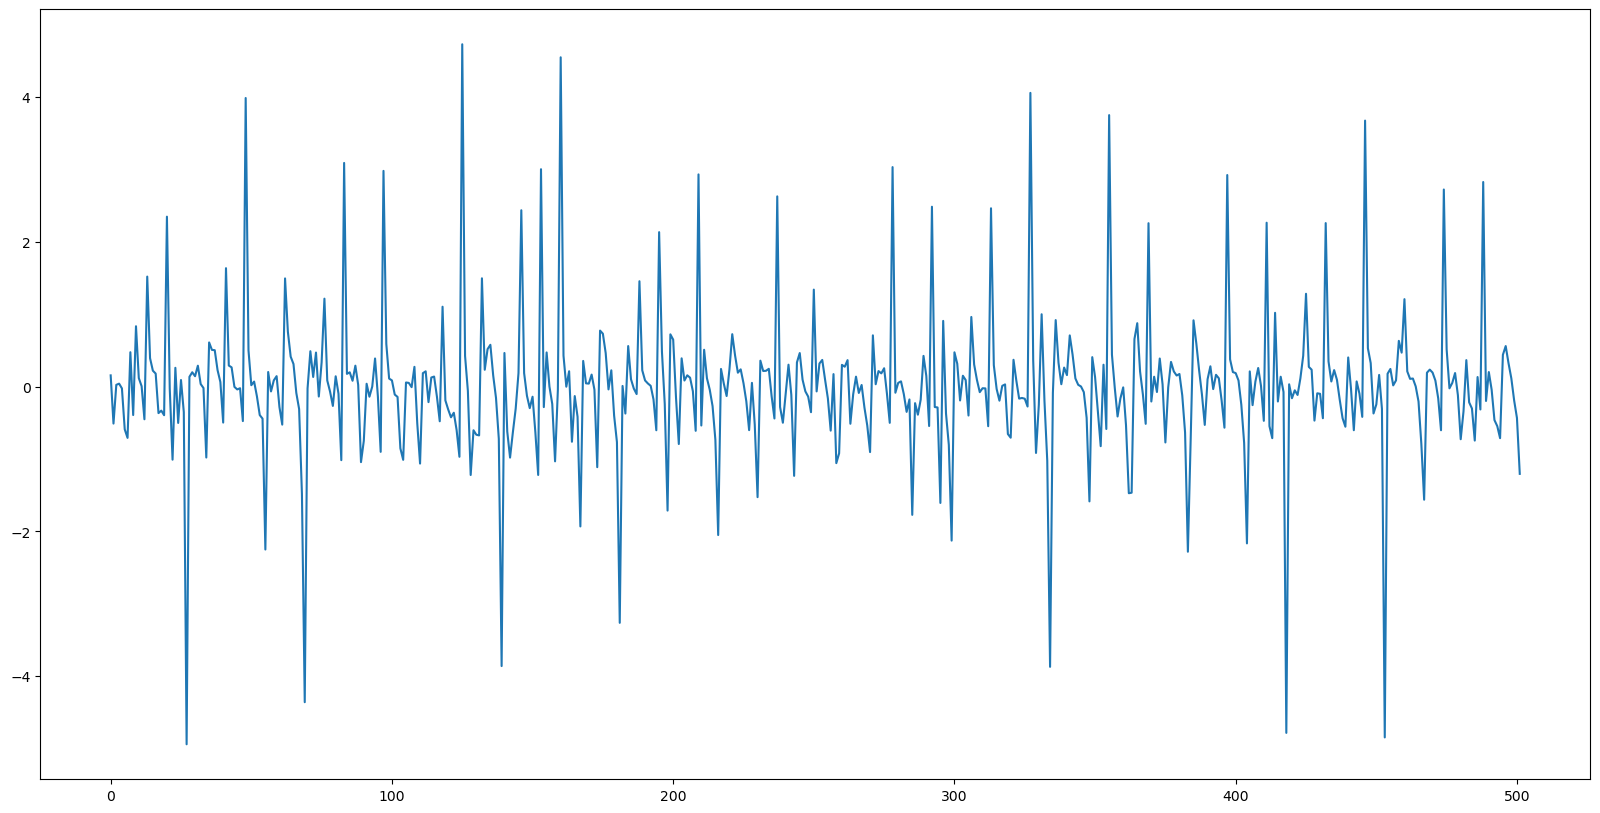

In [71]:
dataDiff.info()

scaler = StandardScaler()

# Reshape necessário para o StandardScaler (ele espera uma matriz 2D)
dataNormal = scaler.fit_transform(dataDiff.values.reshape(-1, 1))

scale_ = scaler.scale_
mean_ = scaler.mean_

# Converter de volta para uma Series
dataNormal = pd.Series(dataNormal.flatten())

dataNormal.info()

plotLine(dataNormal)

BoxCox: Estabiliza a variância e aproximar os dados<br>
Ideal para dados com variância não constante ou assimetria.

In [72]:
# dataNormal, lambda_param = boxcox(data)

In [73]:
adfullerTest(dataNormal)
kolmogorovTest(dataNormal)
andersonTest(dataNormal)

Estatística do teste ADF: -12.904112925305052
Valor-p: 0.0000000000000000
Valores críticos:
   1%: -3.4436298692815304
   5%: -2.867396599893435
   10%: -2.5698893429241916
A série é estacionária.

Teste de Kolmogorov-Smirnov
Estatística: 0.18715121
Valor-p: 0.00000000
Rejeita a hipótese nula (os dados não seguem uma distribuição normal)

Teste de Anderson-Darling
Estatística: 30.98339497
Valores Críticos: ['0.57200000', '0.65100000', '0.78100000', '0.91100000', '1.08300000']
Níveis de Significância: [15.  10.   5.   2.5  1. ]
Para um nível de significância de 15.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 10.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 5.0%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de significância de 2.5%, rejeita a hipótese nula (os dados não seguem uma distribuição normal)
Para um nível de signific

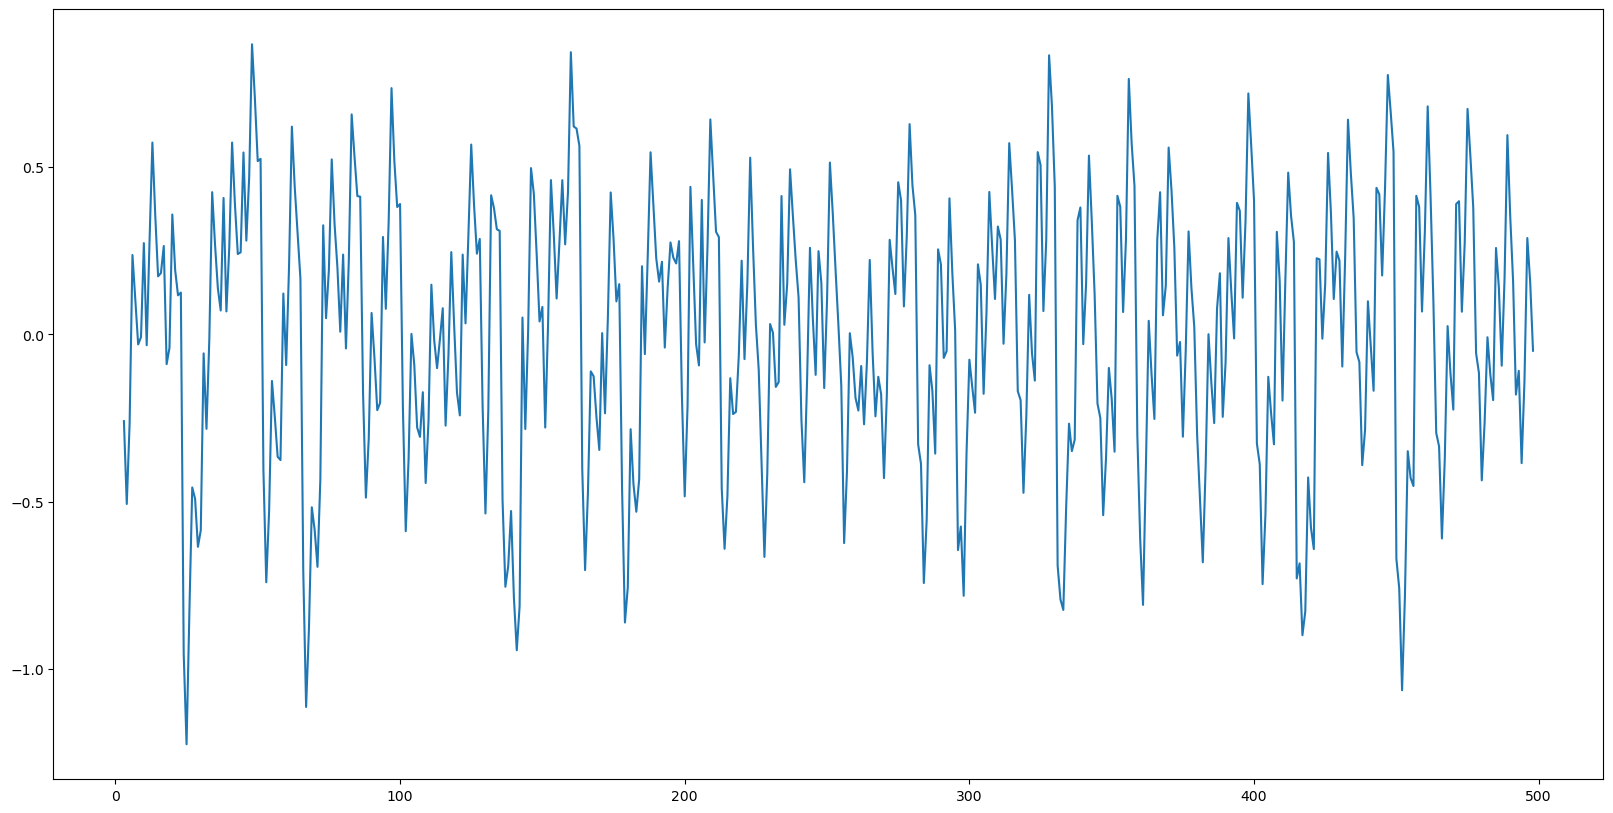

In [74]:
# Decomposição da série temporal
decomposition = seasonal_decompose(dataNormal, model='additive', period=7)

dataCombined = decomposition.seasonal + decomposition.trend
dataCombinedWithResid = decomposition.resid + decomposition.seasonal + decomposition.trend

dataResid = decomposition.resid


# Transforme o resultado em uma Series novamente
dataWithoutResid = pd.Series(dataCombined, index=dataSet['consumoTotal'].index)

dataWithResid = pd.Series(dataCombinedWithResid, index=dataSet['consumoTotal'].index)

plotLine(dataWithoutResid)


#### Auto-Arima

In [75]:
# train, test = model_selection.train_test_split(dataWithoutResid, test_size=0.2)
# model = pm.auto_arima(dataWithoutResid.dropna(),
#                       seasonal=True,
#                       m=7,
#                       trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True,
#                       stepwise=True)
# print(model.summary())

#### SARIMAX

##### Previsão

**Sem Residuos**

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


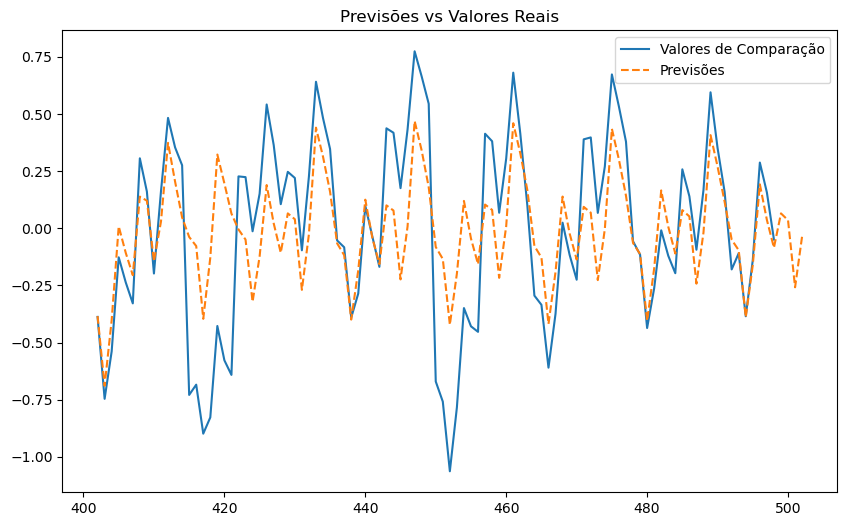

In [76]:
trainSize = int(len(dataWithoutResid)*0.8)
trainData = dataWithoutResid[:trainSize]
comparissonData = dataWithoutResid[trainSize:]

modelo = SARIMAX(trainData, order=(3,1,3), seasonal_order=(2,1,2,7))
modeloSarima = modelo.fit()

predicao = modeloSarima.forecast(steps=len(comparissonData))


plt.figure(figsize=(10, 6))
# plt.plot(dataNormal, label="Valores Originais")
plt.plot(comparissonData, label="Valores de Comparação")
plt.plot(predicao, label="Previsões", linestyle="--")
plt.title("Previsões vs Valores Reais")
plt.legend()
plt.show()

**Com Residuos**

In [77]:
# trainSize = int(len(dataWithResid)*0.95)
# trainData = dataWithResid[:trainSize]
# comparissonData = dataWithResid[trainSize:]

# modelo = SARIMAX(trainData, order=(2,1,1), seasonal_order=(2,1,2,7))
# modeloSarima = modelo.fit(disp=False)

# predicao = modeloSarima.forecast(steps=len(comparissonData))


# plt.figure(figsize=(10, 6))
# # plt.plot(dataNormal, label="Valores Originais")
# plt.plot(comparissonData, label="Valores de Comparação")
# plt.plot(predicao, label="Previsões", linestyle="--")
# plt.title("Previsões vs Valores Reais")
# plt.legend()
# plt.show()

##### Revertendo Transformações

**Adicionando Resíduos**

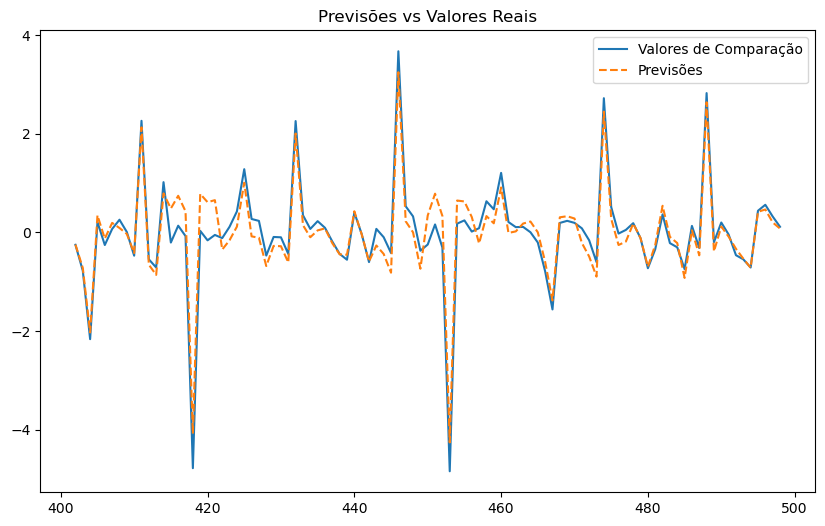

In [78]:
comparissonResidReverted = comparissonData + dataResid[trainSize:]
predicaoResidReverted = predicao + dataResid[trainSize:]

plt.figure(figsize=(10, 6))
# plt.plot(dataNormal, label="Valores Originais")
plt.plot(comparissonResidReverted, label="Valores de Comparação")
plt.plot(predicaoResidReverted, label="Previsões", linestyle="--")
plt.title("Previsões vs Valores Reais")
plt.legend()
plt.show()

**Revertendo StandartScaler**

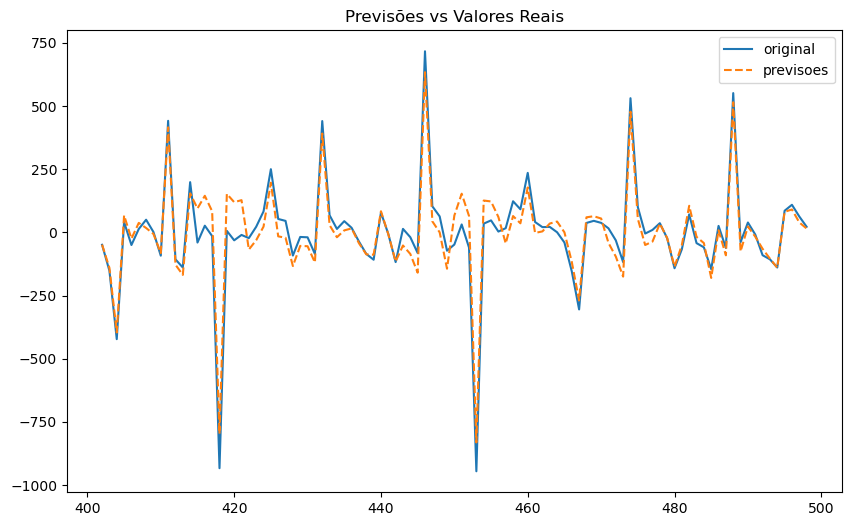

In [79]:
revertStandartComp = comparissonResidReverted * scale_ + mean_
revertStandartPredicao = predicaoResidReverted * scale_ + mean_

plt.figure(figsize=(10, 6))
plt.plot(revertStandartComp, label="original")
plt.plot(revertStandartPredicao, label="previsoes", linestyle="--")
plt.title("Previsões vs Valores Reais")
plt.legend()
plt.show()

**Revertendo Diferenciação**

3400.057425742574
3020.1299637937823


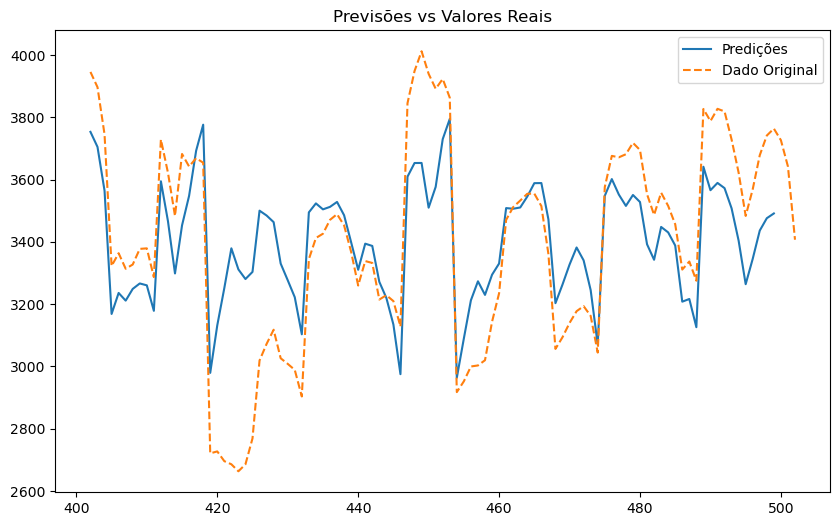

102
<class 'pandas.core.series.Series'>
RangeIndex: 102 entries, 402 to 503
Series name: None
Non-Null Count  Dtype  
--------------  -----  
98 non-null     float64
dtypes: float64(1)
memory usage: 948.0 bytes
<class 'pandas.core.series.Series'>
RangeIndex: 101 entries, 402 to 502
Series name: consumoTotal
Non-Null Count  Dtype  
--------------  -----  
101 non-null    float64
dtypes: float64(1)
memory usage: 940.0 bytes


In [80]:
revertDiffComp = np.cumsum(revertStandartComp)
revertDiffPredicao = np.cumsum(revertStandartPredicao)

revertDiffPredicao = ValorInicialData + np.insert(revertDiffPredicao, 0, 0)
revertDiffComp = ValorInicialData + np.insert(revertDiffComp, 0, 0)

revertDiffComp = pd.Series(revertDiffComp, index=range(trainSize, trainSize + len(revertDiffComp)))
revertDiffPredicao = pd.Series(revertDiffPredicao, index=range(trainSize, trainSize + len(revertDiffPredicao)))

dataParaComparativo = dataSet['consumoTotal'][trainSize:trainSize+len(revertDiffPredicao)]
dataPredicaoTratada = revertDiffPredicao + (dataParaComparativo.mean() - revertDiffPredicao.mean())


print(dataParaComparativo.mean())
print(revertDiffPredicao.mean())

plt.figure(figsize=(10, 6))
# plt.plot(revertDiffPredicao, label="Predições")
plt.plot(dataPredicaoTratada, label="Predições")
plt.plot(dataParaComparativo, label="Dado Original", linestyle="--")
plt.title("Previsões vs Valores Reais")
plt.legend()
plt.show()
print(len(revertDiffPredicao))
revertDiffComp.info()
data[trainSize:].info()

##### Métricas de Avaliação

  🔹 R² (Coeficiente de Determinação): 0.54
  🔹 RMSE (Erro Quadrático Médio):     228.40
  🔹 MAE (Erro Absoluto Médio):        180.35
  🔹 MAPE (Erro Percentual Absoluto):  5.55%
  🔹 Acurácia:                         94.45%


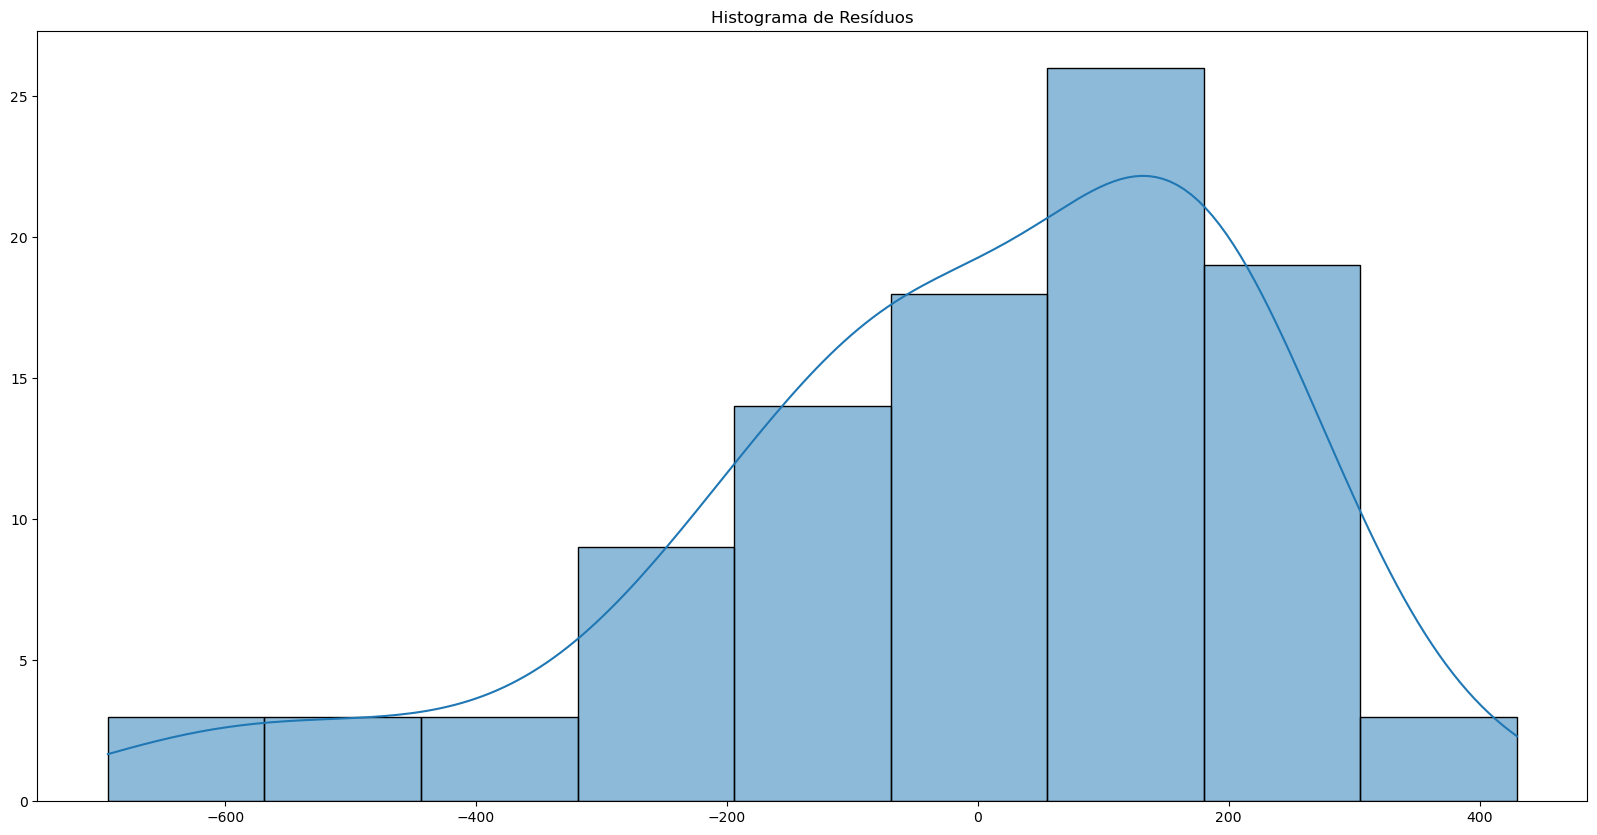

In [ ]:
dataParaComparativo = dataParaComparativo.dropna()
dataPredicaoTratada = dataPredicaoTratada.dropna()

dataParaComparativo = dataParaComparativo[:dataPredicaoTratada.size]
dataPredicaoTratada = dataPredicaoTratada[:dataParaComparativo.size]



def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Evitar divisão por zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Calcular métricas
# f1 = f1_score(dataParaComparativo, dataPredicaoTratada)
r2 = r2_score(dataParaComparativo, dataPredicaoTratada)
rmse = np.sqrt(mean_squared_error(dataParaComparativo, dataPredicaoTratada))
mae = mean_absolute_error(dataParaComparativo, dataPredicaoTratada)
mape = mean_absolute_percentage_error(dataParaComparativo.values, dataPredicaoTratada.values)
accuracy = 100 - mape

# print(f"  🔹 R² (Coeficiente de Determinação): {f1:.2f}") #Função criada para teste, entretanto não foi possivel aplicar aqui
print(f"  🔹 R² (Coeficiente de Determinação): {r2:.2f}")
print(f"  🔹 RMSE (Raiz Quadrada do Erro Quadrático Médio):     {rmse:.2f}")
print(f"  🔹 MAE (Erro Absoluto Médio):        {mae:.2f}")
print(f"  🔹 MAPE (Erro Percentual Absoluto):  {mape:.2f}%")
print(f"  🔹 Acurácia:                         {accuracy:.2f}%")

plotHistogram(np.array(dataParaComparativo)- np.array(dataPredicaoTratada), title="Histograma de Resíduos")

## Testes (provisório)

### Testes e visualização da distribuição da série

#### Teste com tendência

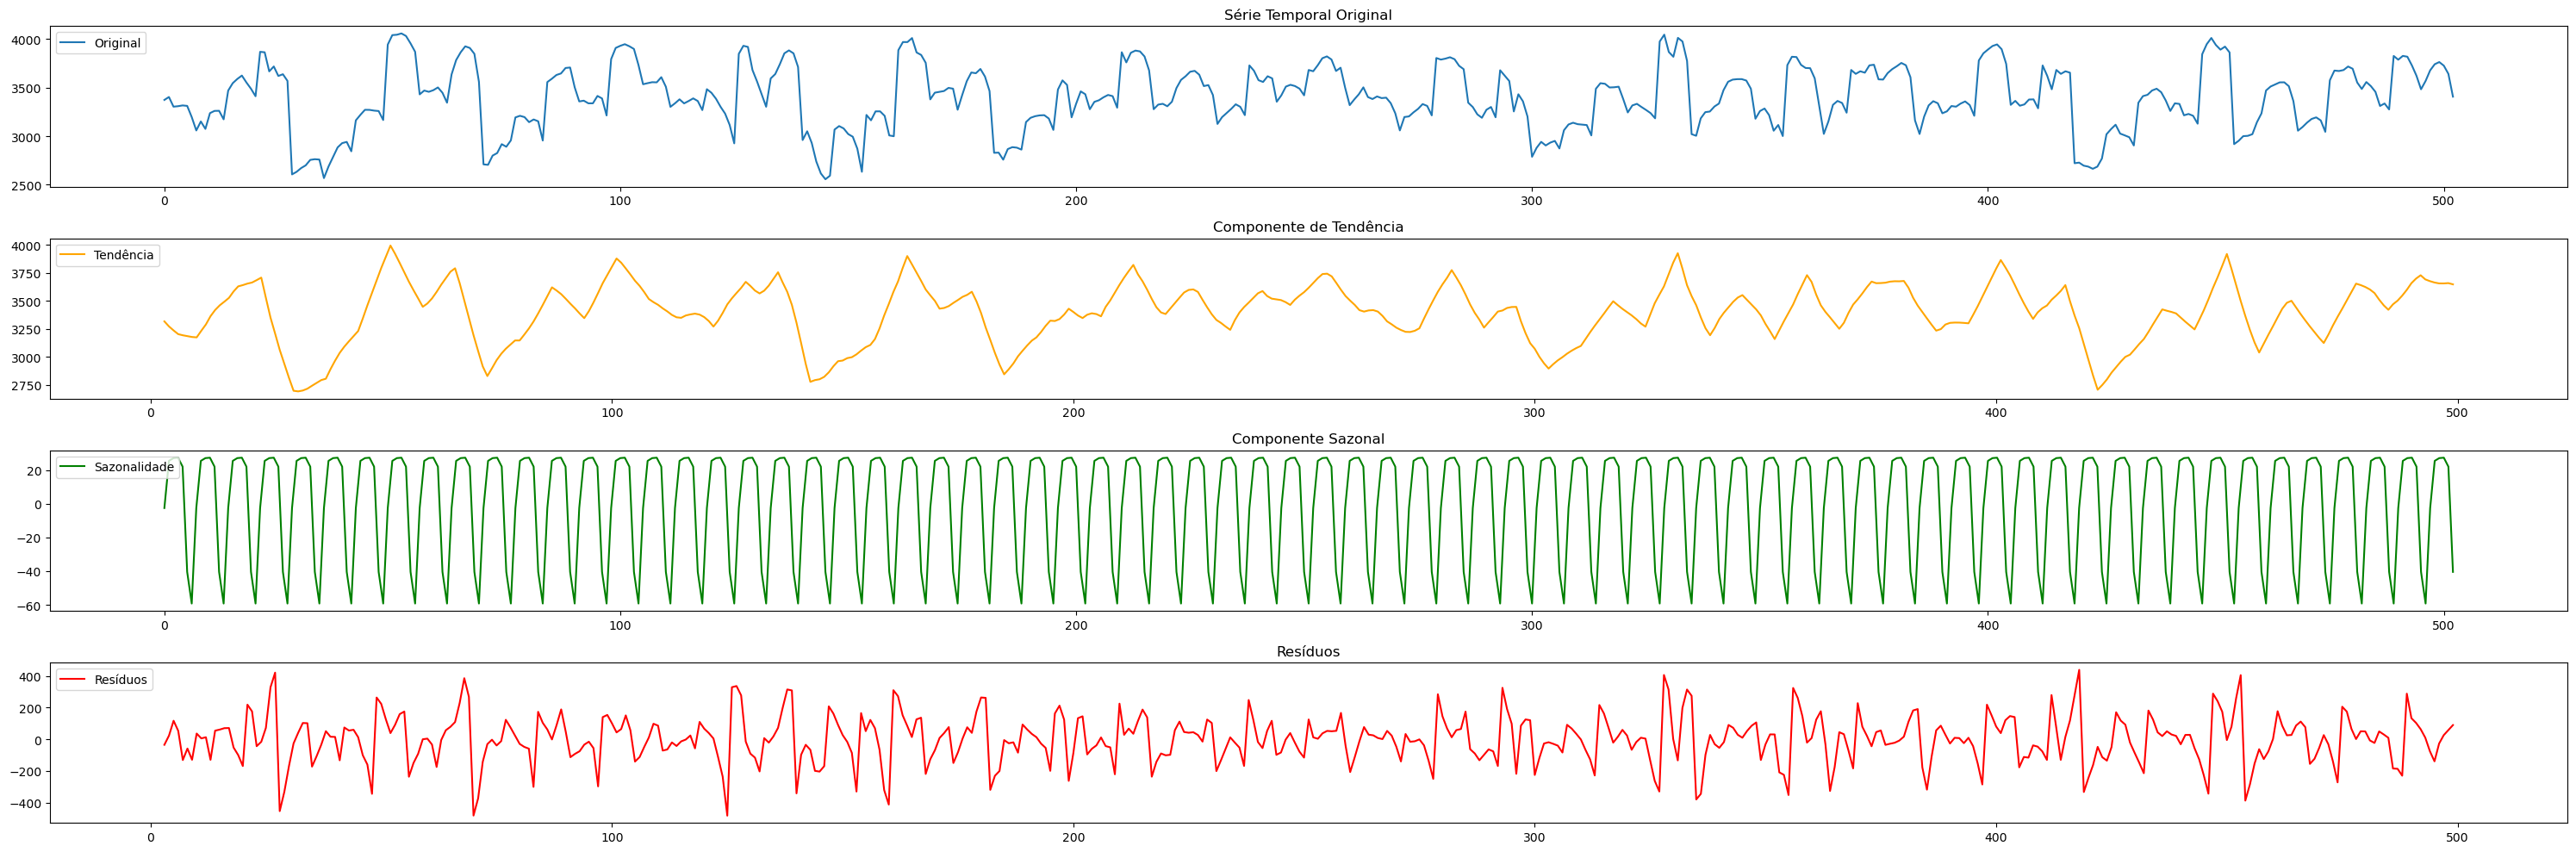

In [82]:
decomposicao = seasonal_decompose(data, model='additive', period=periodicidade)

plt.figure(figsize=(30, 10))

plt.subplot(411)
plt.plot(dataSet['consumoTotal'], label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

#### Teste removendo a tendência

##### Primeira Diferenciação

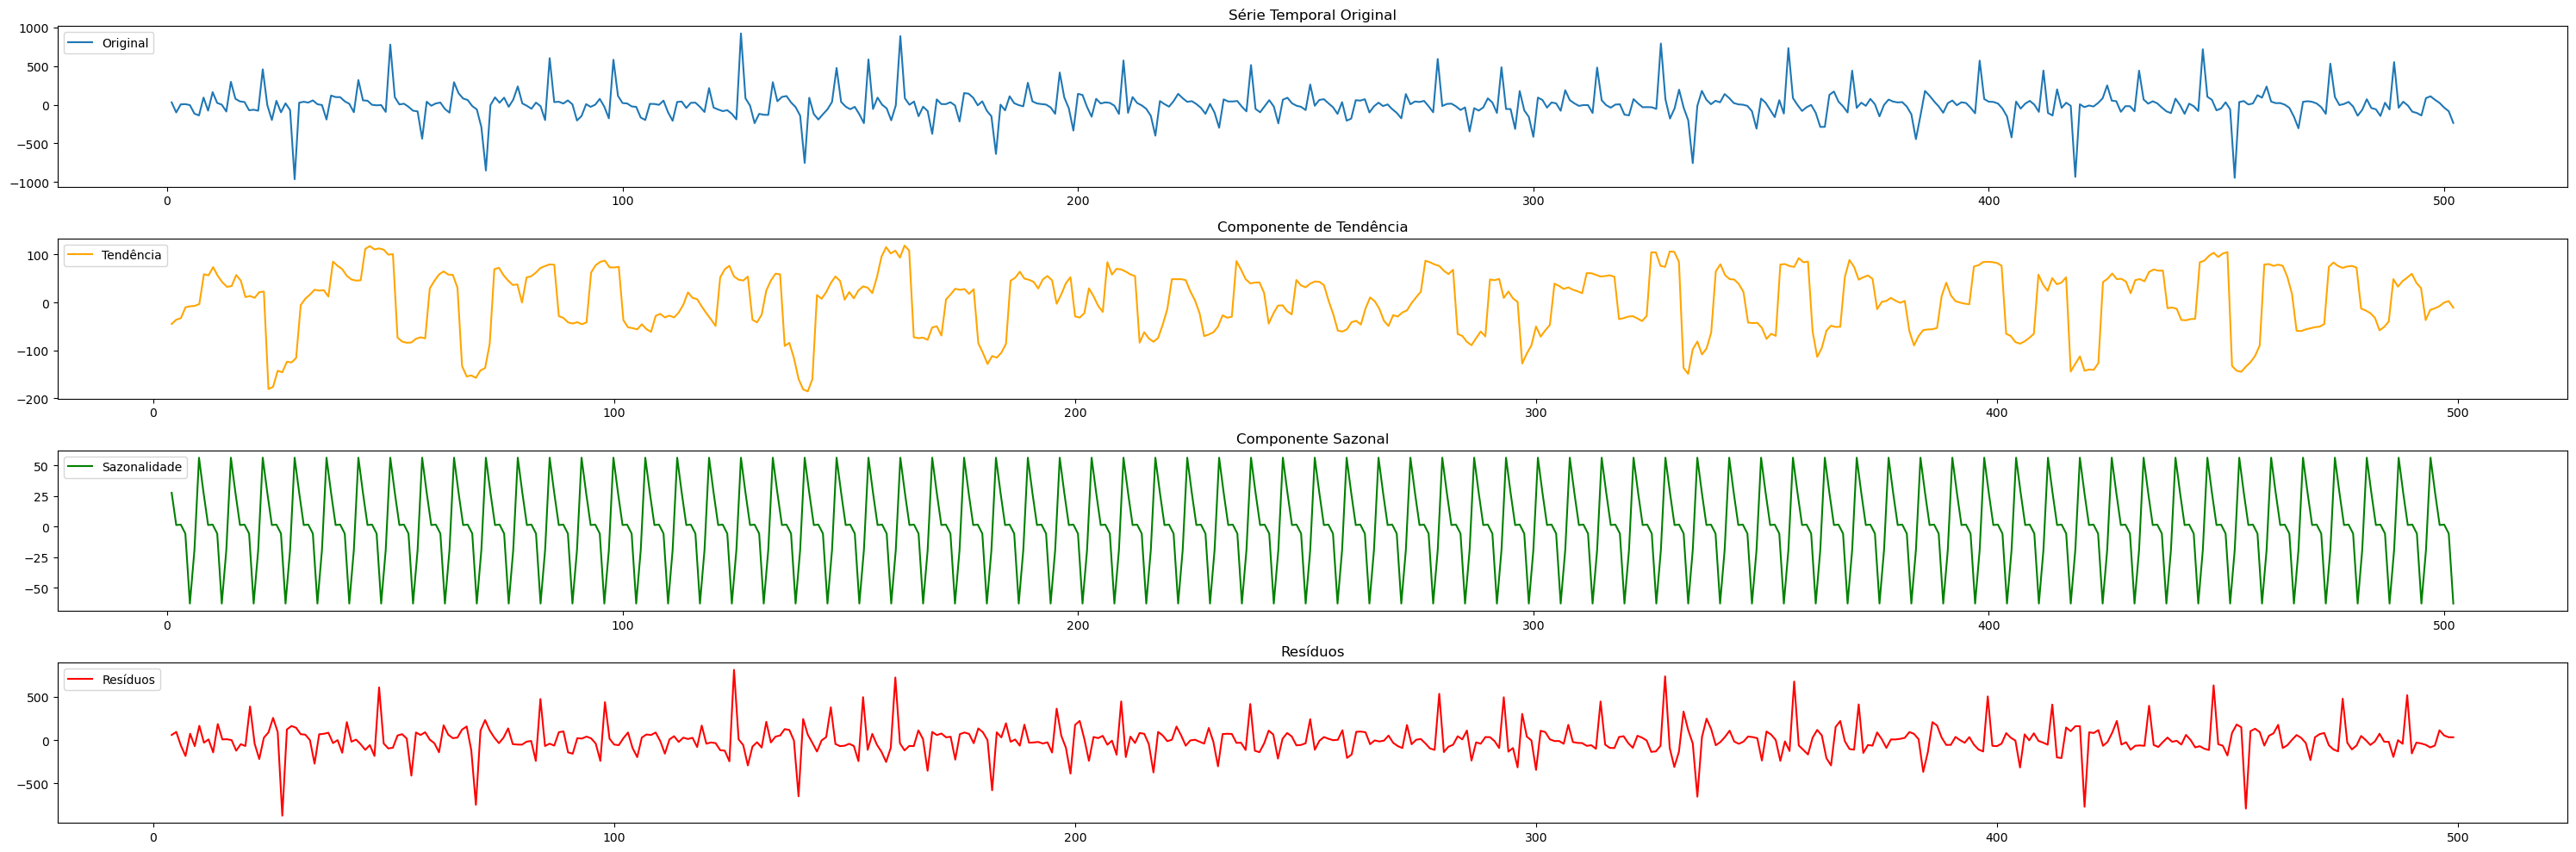

In [83]:
dataDiff1 = dataSet['consumoTotal'].diff().dropna()

decomposicao = seasonal_decompose(dataDiff1, model='additive', period=periodicidade)

plt.figure(figsize=(30, 10))

plt.subplot(411)
plt.plot(dataDiff1, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

##### Segunda diferenciação

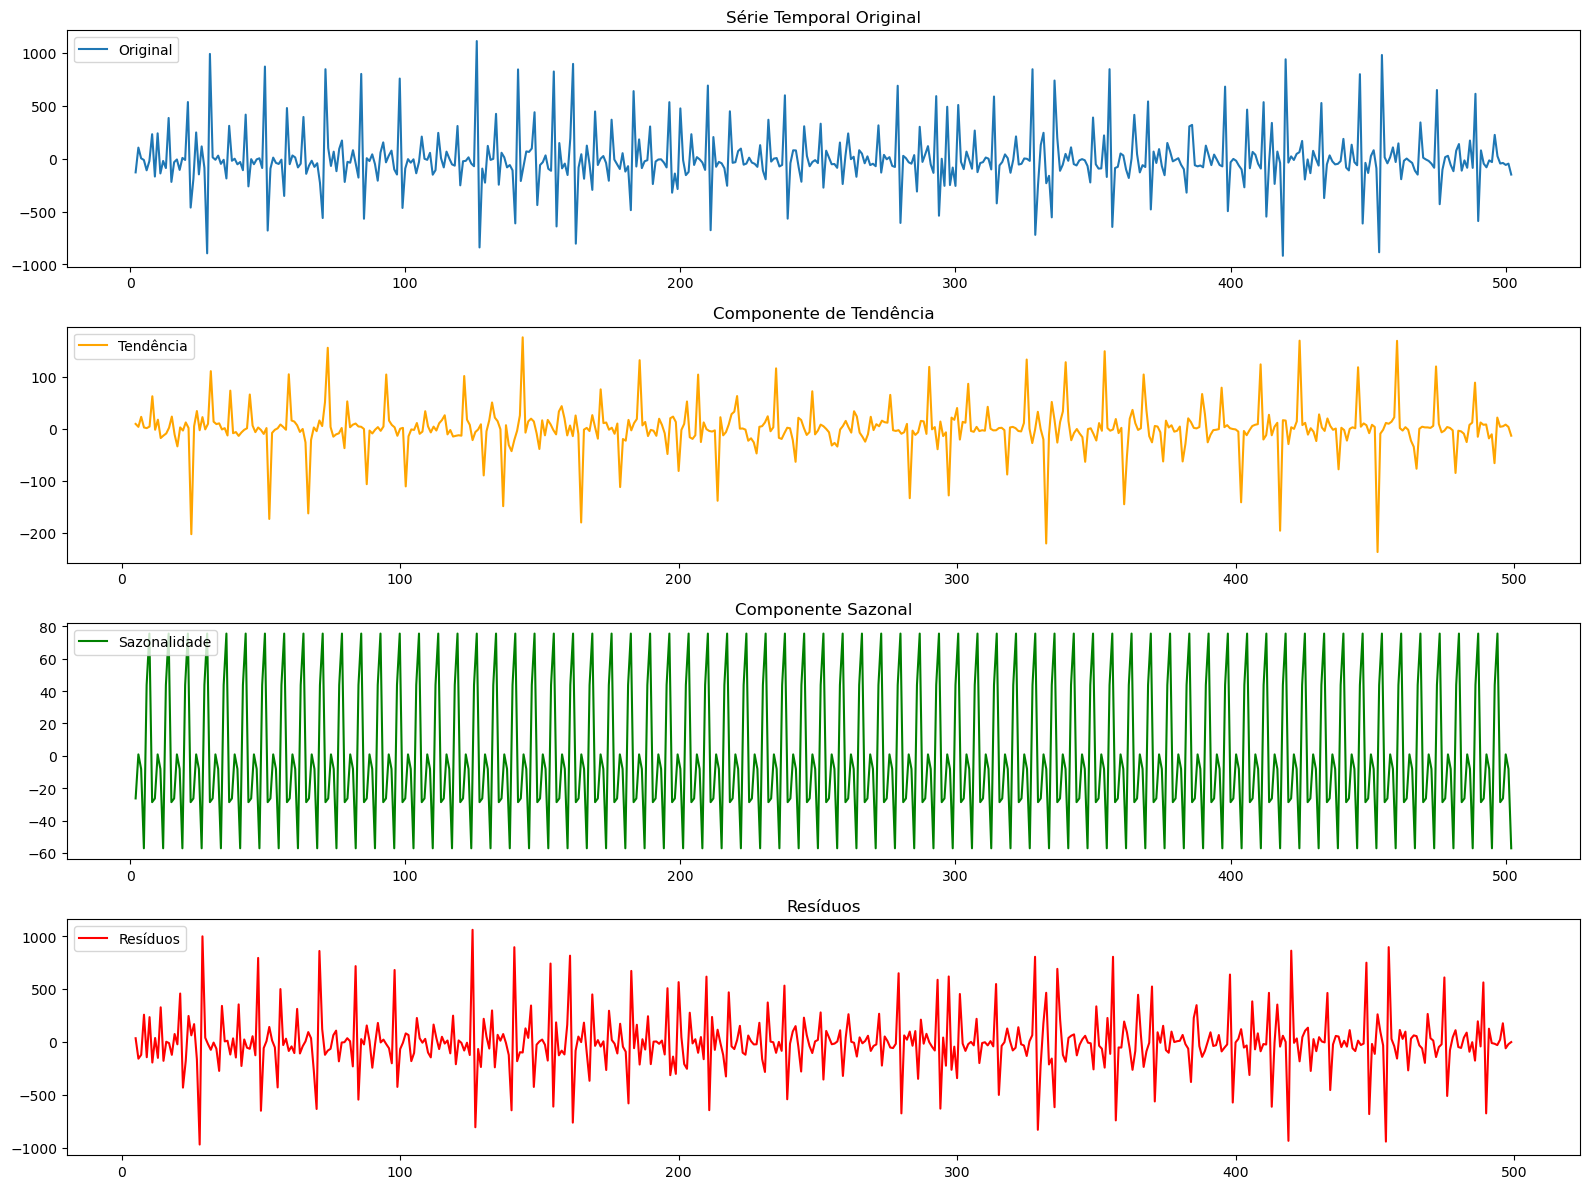

In [84]:
dataDiff2 = dataDiff1.diff().dropna()

decomposicao = seasonal_decompose(dataDiff2, model='additive', period=periodicidade)

plt.figure(figsize=(16, 12))

plt.subplot(411)
plt.plot(dataDiff2, label='Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência', color='orange')
plt.legend(loc='upper left')
plt.title('Componente de Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')
plt.title('Componente Sazonal')

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos', color='red')
plt.legend(loc='upper left')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

#### Histograma

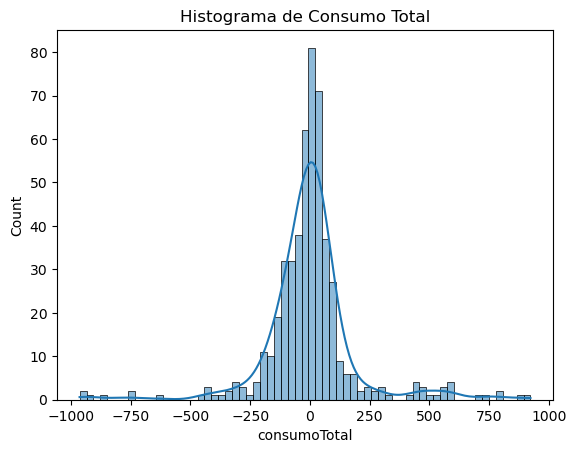

In [85]:
sns.histplot(dataDiff1, kde=True)
plt.title('Histograma de Consumo Total')
plt.show()

#### Gráfico Q-Q

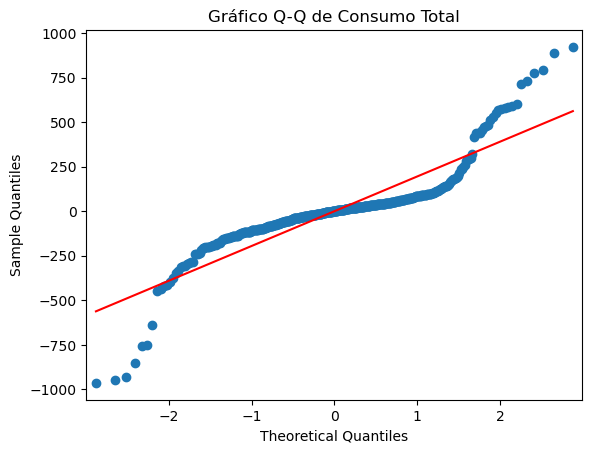

In [86]:
sm.qqplot(dataDiff1, line='s')
plt.title('Gráfico Q-Q de Consumo Total')
plt.show()

#### Teste Shapiro-Wilk

In [87]:
def shapiro(data):
    shapiroTest = stats.shapiro(data)
    print('Shapiro-Wilk Test:')
    print(f'W= {shapiroTest[0]:.8f}')
    print(f'Valor-P= {shapiroTest[1]:.8f}')
    print()

#### Realizar o teste de Anderson-Darling